# Steiner Tree Method Comparison with Benchmarking and Statistics

This tutorial evaluates different Steiner tree algorithms implemented in the `steinernet` package.

- Uses a random walk generated base graph
- Computes Steiner trees using multiple heuristics
- Measures runtime and total tree weight
- Performs Wilcoxon signed-rank test for pairwise statistical comparison

## 1. Setup

In [5]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon
from steinernet.steiner import SteinerNet
from steinernet.random_walk_tree import random_walk_tree

## 2. Generate Random Walk Base Graph

G nodes: [9, 4, 3, 2, 8, 1, 7, 0, 6, 5]
Terminals used for benchmarking: [9, 0, 6, 5, 2]


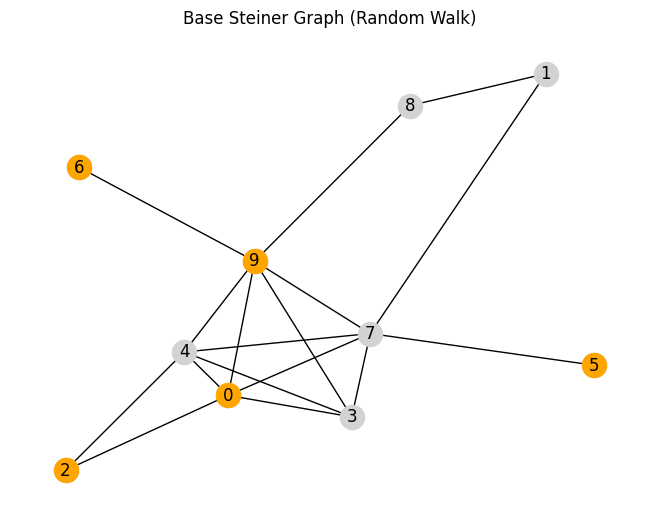

In [3]:
# Base graph

base_graph = nx.complete_graph(10)
for u, v in base_graph.edges():
    base_graph[u][v]['weight'] = random.randint(1, 10)

# Terminals
terminals = random.sample(list(base_graph.nodes()), 5)

# Generate Steiner base graph using random walk
G = random_walk_tree(base_graph, terminals, seed=42)

# Filter terminals to only those present in G
terminals = [t for t in terminals if t in G.nodes]
print("G nodes:", list(G.nodes))
print("Terminals used for benchmarking:", terminals)

# Visualize
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgray')
nx.draw_networkx_nodes(G, pos, nodelist=terminals, node_color='orange')
plt.title("Base Steiner Graph (Random Walk)")
plt.show()

## 3. Run All Methods and Benchmark

In [8]:
sn = SteinerNet(G)
tree = sn.steinertree(terminals, method="ASP", repeats=1, optimize=True)
print(f"Tree nodes: {list(tree.nodes())}")


Tree nodes: [9, 4, 0, 6, 7, 5, 2, 3]


In [18]:
methods = ['SP', 'RSP', 'SPM', 'ASP', 'EXA',]# KB   'RW' is a random walk subgraph, not a tree method
print("Available methods:", methods)
results = []

        

for method in methods:
    times = []
    scores = []
    for i in range(5):
        print(f"Method: {methods[i]}:")
        start = time.time()
        sn = SteinerNet(G)
        tree = sn.steinertree(terminals, method=methods[i], repeats=1, optimize=True)
        end = time.time()
        times.append(end - start)
        print(f"Time taken: {end - start:.4f} seconds")
        print(f"Tree size: {tree.size(weight='weight')}")
        print(f"Tree edges: {list(tree.edges(data=True))}")
        print(f"Tree nodes: {list(tree.nodes())}")
        scores.append(len(list(tree.nodes())))  
    for score, t in zip(scores, times):
        results.append({"method": method, "score": score, "time": t})

bench_df = pd.DataFrame(results)

Available methods: ['SP', 'RSP', 'SPM', 'ASP', 'EXA']
Method: SP:
Time taken: 0.0006 seconds
Tree size: 9.0
Tree edges: [(9, 4, {}), (9, 6, {}), (9, 7, {}), (4, 0, {}), (4, 2, {}), (4, 3, {}), (0, 7, {}), (7, 5, {}), (7, 3, {})]
Tree nodes: [9, 4, 0, 6, 7, 5, 2, 3]
Method: RSP:
Time taken: 0.0002 seconds
Tree size: 6.0
Tree edges: [(0, 4, {}), (4, 2, {}), (4, 9, {}), (9, 6, {}), (9, 7, {}), (7, 5, {})]
Tree nodes: [0, 4, 2, 9, 6, 7, 5]
Method: SPM:
Time taken: 0.0003 seconds
Tree size: 7.0
Tree edges: [(9, 4, {}), (9, 6, {}), (9, 7, {}), (4, 0, {}), (4, 2, {}), (4, 3, {}), (7, 5, {})]
Tree nodes: [9, 4, 0, 6, 7, 5, 2, 3]
Method: ASP:
Time taken: 0.0002 seconds
Tree size: 9.0
Tree edges: [(9, 4, {}), (9, 6, {}), (9, 7, {}), (4, 0, {}), (4, 2, {}), (4, 3, {}), (0, 7, {}), (7, 5, {}), (7, 3, {})]
Tree nodes: [9, 4, 0, 6, 7, 5, 2, 3]
Method: EXA:
Time taken: 0.0019 seconds
Tree size: 31.0
Tree edges: [(9, 4, {'weight': 3}), (9, 6, {'weight': 7}), (9, 7, {'weight': 8}), (4, 0, {'weight': 2}

## 4. Visualize Benchmark Results

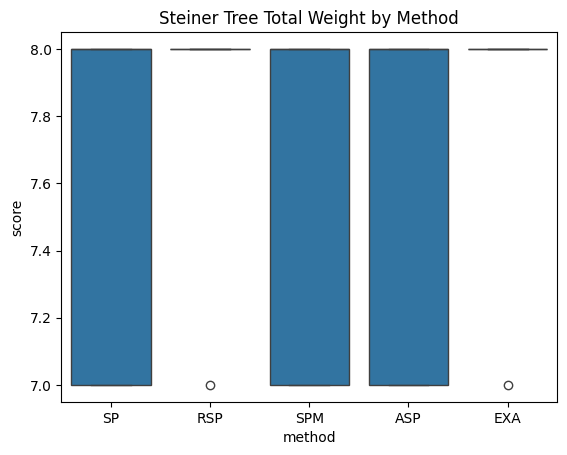

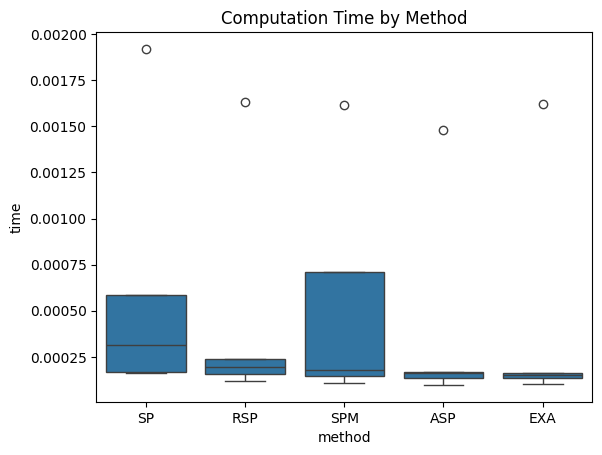

In [19]:
sns.boxplot(data=bench_df, x="method", y="score")
plt.title("Steiner Tree Total Weight by Method")
plt.show()

sns.boxplot(data=bench_df, x="method", y="time")
plt.title("Computation Time by Method")
plt.show()

## 5. Pairwise Wilcoxon Signed-Rank Tests

In [9]:
from itertools import combinations

print("Wilcoxon p-values (score comparison):")
methods_unique = bench_df['method'].unique()

for m1, m2 in combinations(methods_unique, 2):
    s1 = bench_df[bench_df['method'] == m1]['score'].values
    s2 = bench_df[bench_df['method'] == m2]['score'].values
    if len(s1) == len(s2):
        stat, p = wilcoxon(s1, s2)
        print(f"{m1} vs {m2}: p = {p:.4f}")

Wilcoxon p-values (score comparison):
SP vs RSP: p = 1.0000
SP vs SPM: p = 1.0000
SP vs ASP: p = 1.0000
SP vs EXA: p = 1.0000
RSP vs SPM: p = 1.0000
RSP vs ASP: p = 1.0000
RSP vs EXA: p = 1.0000
SPM vs ASP: p = 1.0000
SPM vs EXA: p = 1.0000
ASP vs EXA: p = 1.0000


/opt/miniconda3/envs/kgICL/lib/python3.12/site-packages/scipy/stats/_wilcoxon.py:172: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
